**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Nalan Kurnaz
</br>Student Number: 300245521

I also will submit a pdf file that has mre explanations and screenshots in it.

# Exploratory Analysis

## Import important libraries

In [39]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
# Your code goes here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [47]:
url_glass = 'https://raw.githubusercontent.com/nalank1/CSI4106/main/A1/a1/01/glass.csv'
url_dermatology = 'https://raw.githubusercontent.com/nalank1/CSI4106/main/A1/a1/02/dermatology_database_1.csv'
url_maternal = 'https://raw.githubusercontent.com/nalank1/CSI4106/main/A1/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv'
url_cars = 'https://raw.githubusercontent.com/nalank1/CSI4106/main/A1/a1/04/car.data'
url_wine = 'https://raw.githubusercontent.com/nalank1/CSI4106/main/A1/a1/05/WineQT.csv'
url_16p = 'C:/Users/16132/OneDrive - University of Ottawa/Desktop/NALAN LECTURES/CSI4106/A1/a1/06/16p.csv'
url_last = 'https://raw.githubusercontent.com/nalank1/CSI4106/main/A1/a1/07/train.csv'
# provide the link to the raw version of dataset. You *need* to provide a link to *your own* github repository. DO NOT use the link that is provided as an example.
dataset1 = pd.read_csv(url_glass)
dataset2 = pd.read_csv(url_dermatology)
dataset3 = pd.read_csv(url_maternal)
dataset4 = pd.read_csv(url_cars)
dataset5 = pd.read_csv(url_wine)
dataset6 = pd.read_csv(url_16p, encoding='ISO-8859-1')
dataset7 = pd.read_csv(url_last, low_memory=False)

## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? speecifically, which attribute or attributes has missing values? </br>

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.3 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

<h3>Written Solutions</h3>

**1.1**

In Dataset 02 (Dermatology), it was observed that age attribute has 8 missing values. </br>
In Dataset 07 (train), there were irregular data values observed in 
- Name 
- Monthly Inhand Salary
- Type of Loan
- Num_of_Delayed_Payment
- Num_Credit_Inquiries
- Credit_History_Age
- Amount_invested_monthly 
- Monthly_Balance attributes. 
There are also rows with irregular values which are exhibited by running the output.

**1.2** 

Methodology used for finding the missing values is I first did a initial inspection where I used `isnull().sum()` function to count missing values for every attributes in datasets. It was observed that some datasets were consisting '?' or '' or any other placeholders as missing values. I replaced them with `pd.NA` because pandas can't detect symbols like '?' or '' as missing values so I needed to replace them to NaN output. After replacement, I wanted to check for rows containing missing values `any(axis=1)` checks each row to see if any values in the row are missing.

**1.3**

The imputation strategies I proposed for each attribute with missing values are in the following: <br>

- Numerical Attributes: For numerical attributes, I used mean imputation. This method replaced missing values with the mean of the respective column.

- Categorical Attributes: For categorical attributes, I used mode imputation, which had replaced missing values with the most frequently occurring category.
 The answers can be seen by running the last codespace of Part 1. I also did code to see the details of each dataset.



In [42]:
# 1.1 Missing Values

for i, dataset in enumerate([dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7]):
  print(f"Dataset {i+1}:")
  missing_values = dataset.isnull().sum()
  print(missing_values)
  print("\n")
  dataset.replace(['?', '', '____'], pd.NA, inplace=True)
  missing_values = dataset.isnull().sum()
  print("Missing values for each attribute after replacing '?' with NA: ")
  print(missing_values)
  

  print("\n")
  rows_with_missing_values = dataset[dataset.isnull().any(axis=1)]
  print("Rows with missing values: ")
  print(rows_with_missing_values)
  print("\n")



Dataset 1:
Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


Missing values for each attribute after replacing '?' with NA: 
Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


Rows with missing values: 
Empty DataFrame
Columns: [Id, RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type of glass]
Index: []


Dataset 2:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_invo

In [48]:
dataset1.info()
dataset2.info()
dataset3.info()
dataset4.info()
dataset5.info()
dataset6.info()
dataset7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                        

In [49]:
dataset2[dataset2['age'].str.isnumeric() == False] #rows not numeric in the age column

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


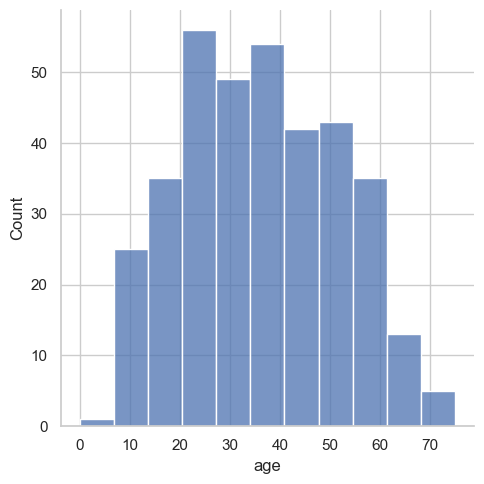

In [50]:
#Determining the Imputation Technique
#Age Distribution
plot_data = dataset2[dataset2['age'] != '?']

sns.displot(plot_data['age'].astype(int))
plt.show()

In [51]:
# #1.3 Data Imputation
# #Glass - Numerical but it doesn't have missing values
# #Dermatology - Categorical since age is object type - it has missing values - mode imputation
# #Maternal - No missing values
# #Cars - No Missing values
# #Wine - No missing values
# #16P - No missing values
# #Train.csv - Both Numerical and Categorical (Missing) both object and integer types are present in the dataset - mean and mode imputation


#  perform mean imputation for numerical columns
def mean_imputation(dataset):
    numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns  # identifying numerical columns
    for column in numerical_columns:
        if dataset[column].isnull().sum() > 0:  # checking if the column has missing values
            mean_value = dataset[column].mean()  # calculating the mean of the column
            dataset[column].fillna(mean_value, inplace=True)  # replacing missing values with mean
            print(f"Filled the missing values with mean: {mean_value} for column: {column}")
    return dataset

# perform mode imputation for categorical columns
def mode_imputation(dataset):
    categorical_columns = dataset.select_dtypes(include=['object']).columns  # identifying categorical columns
    for column in categorical_columns:
        if dataset[column].isnull().sum() > 0:  # checking if the column has missing values
            mode_value = dataset[column].mode()[0]  # calculating the mode of the column
            dataset[column].fillna(mode_value, inplace=True)  # replacing missing values with mode
            print(f"Filled the missing values with mode: {mode_value} for column: {column}")
    return dataset

# mean imputation for Dataset 7 (Train)
print("Dataset 7 before mean imputation: ")
print(dataset7.isnull().sum())
dataset7 = mean_imputation(dataset7)  # mean imputation for numerical columns

#mode imputation for Dataset 7 (Train) - Apply mode imputation as well
print("\nDataset 7 before mode imputation: ")
print(dataset7.isnull().sum())
dataset7 = mode_imputation(dataset7)  # mode imputation for categorical columns
print("\nDataset 7 after mode imputation: ")
print(dataset7.isnull().sum())

# mode imputation for Dataset 2 (Dermatology)
print("\nDataset 2 before imputation: ")
print(dataset2.isnull().sum())
dataset2 = mode_imputation(dataset2)  # mode imputation
print("\nDataset 2 after imputation: ")
print(dataset2.isnull().sum())



Dataset 7 before mean imputation: 
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


C:\Users\16132\AppData\Local\Temp\ipykernel_2816\3466759427.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(mean_value, inplace=True)  # Replace missing values with mean
C:\Users\16132\AppData\Local\Temp\ipykernel_2816\3466759427.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Filled the missing values with mode: Langep for column: Name
Filled the missing values with mode: Not Specified for column: Type_of_Loan
Filled the missing values with mode: 19 for column: Num_of_Delayed_Payment
Filled the missing values with mode: 15 Years and 11 Months for column: Credit_History_Age
Filled the missing values with mode: __10000__ for column: Amount_invested_monthly
Filled the missing values with mode: __-333333333333333333333333333__ for column: Monthly_Balance

Dataset 7 after mode imputation: 
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
C

2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific application? Do you possess expertise in this particular domain of application?


**2.1**

The objective of the classification task using Dermatology dataset is to develop a model that can identify different skin diseases that show similar symptoms, specifically erythema and scaling. The objective of the task would be intended for doctors to be able to diagnose and distinguish between similar skin diseases. 
I don't possess expertise but I am familiar with terminology in the skin diseases and cancer types especially ovarian cancer as I had an experience to shadow at Vanderhyden Lab, and I also studied Biochemistry before Computer Science.

### 2.1 


In [ ]:
# Your code goes here

3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

**3.1**

To classify an attribute as uninformative, it typically needs to meet one of two criteria: a high percentage of missing values (generally more than 50%) or a very low number of unique values. By unique values, I’m referring to attributes that contain only one unique or constant value. Attributes with more than 50% missing data are often unreliable, as they can introduce bias or inaccuracies when included in the model. Similarly, attributes with few unique values lack the variation needed to distinguish between different instances in the dataset, rendering them redundant and adding little to no value to the analysis.

**3.2**

It was observed that while a few of the histograms displayed normal distributions, the majority showed skewed distributions, indicating a lack of symmetry in the data. This skewness could mean that certain values occur more frequently at one end of the spectrum, meaning irregularities or underlying trends. Furthermore, as seen in the outputs, several attributes revealed outliers in their boxplots, represented by dots, which could signify data points that are significantly different from the rest of the dataset. The interquartile ranges (IQR) in some attributes were narrow, meaning that most of the data points clustered closely together, while others exhibited wider IQRs, indicating more spread-out data. For example, certain attributes didn't produce proper boxplots, such as the erythema attribute, where the boxplot appeared as a line due to the lack of variability. This could mean that the data values are gathered at a single point which may jeopardize our research and analysis in Dermatology Dataset.





In [52]:

# 3.1

#uninformative if there is high percentage of missing values and low number of unique values (doesn't vary )

def analyze_informativeness(dataset):
    informative_columns = []
    uninformative_columns = []

    for column in dataset.columns:
        unique_values = dataset[column].nunique()
        missing_percentage = dataset[column].isnull().mean() * 100

        if missing_percentage > 50: #more than 50% missing values 
            uninformative_columns.append(column)
        elif unique_values <= 1:
            uninformative_columns.append(column)
        else:
            informative_columns.append(column)
    return informative_columns, uninformative_columns

informative_columns, uninformative_columns = analyze_informativeness(dataset2)
print(f"Informative columns: {informative_columns}")
print(f"Uninformative columns: {uninformative_columns}")

if not uninformative_columns:
    print("There are no uninformative columns in the dataset")




Informative columns: ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_rete_ridges', 'elongation_rete_ridges', 'thinning_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_granular_layer', 'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate', 'band_like_infiltrate', 'age', 'class']
Uninformative columns: []
There are no uninformative columns in the dataset


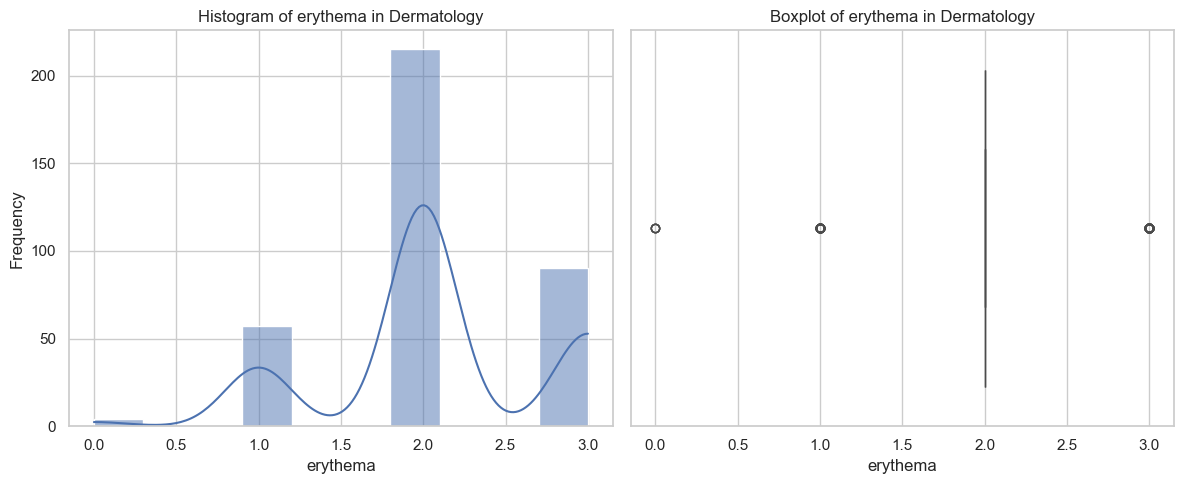

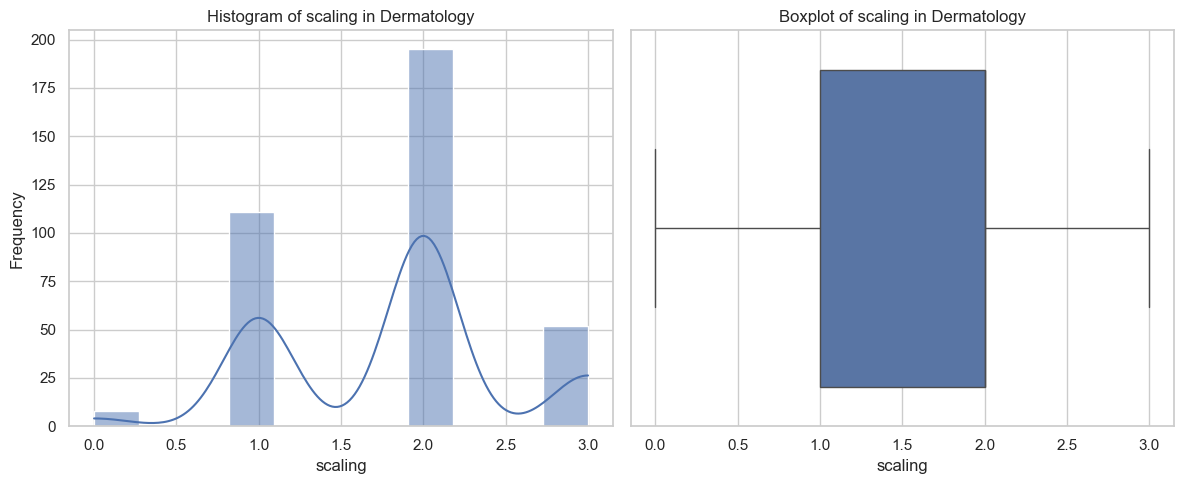

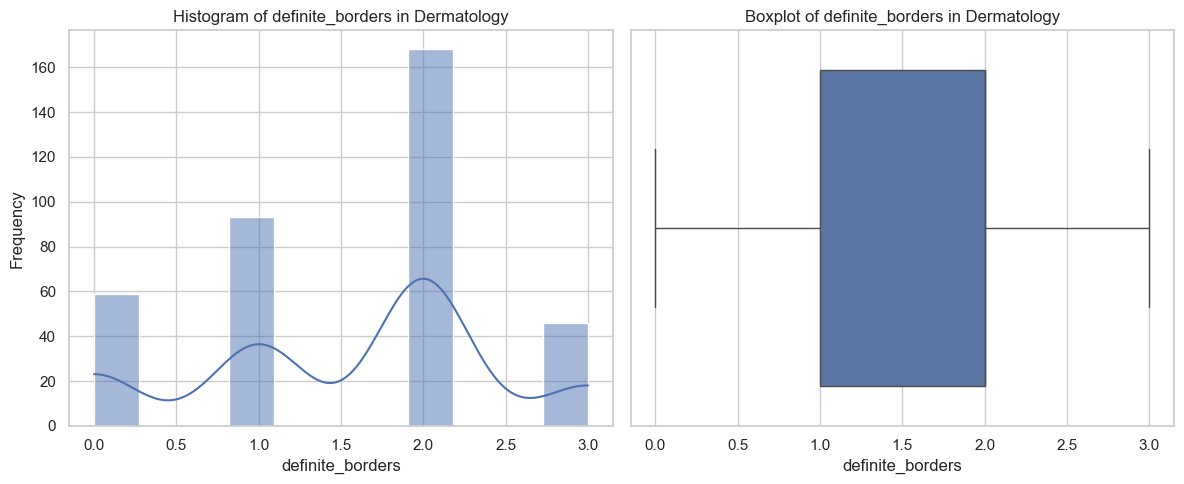

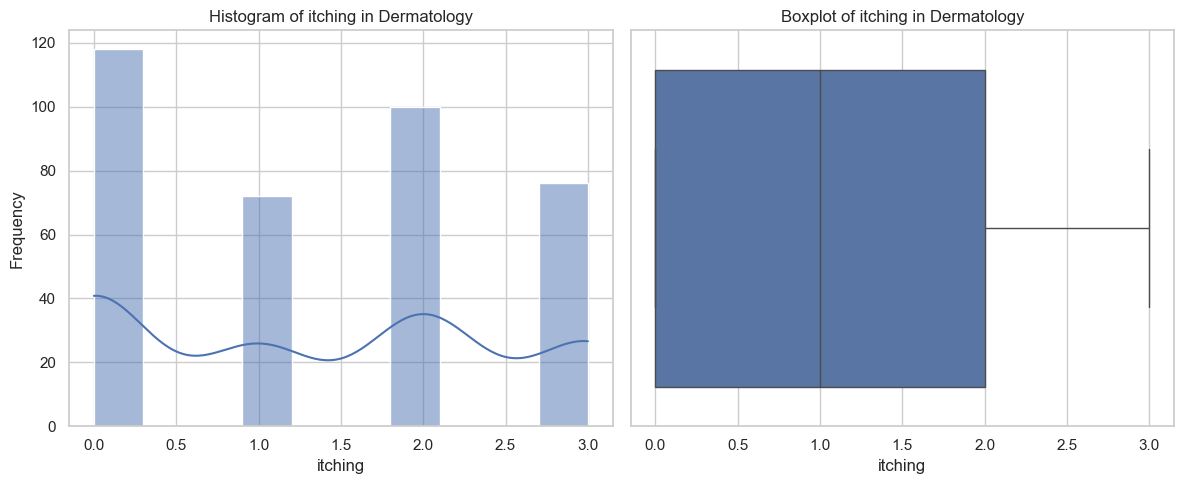

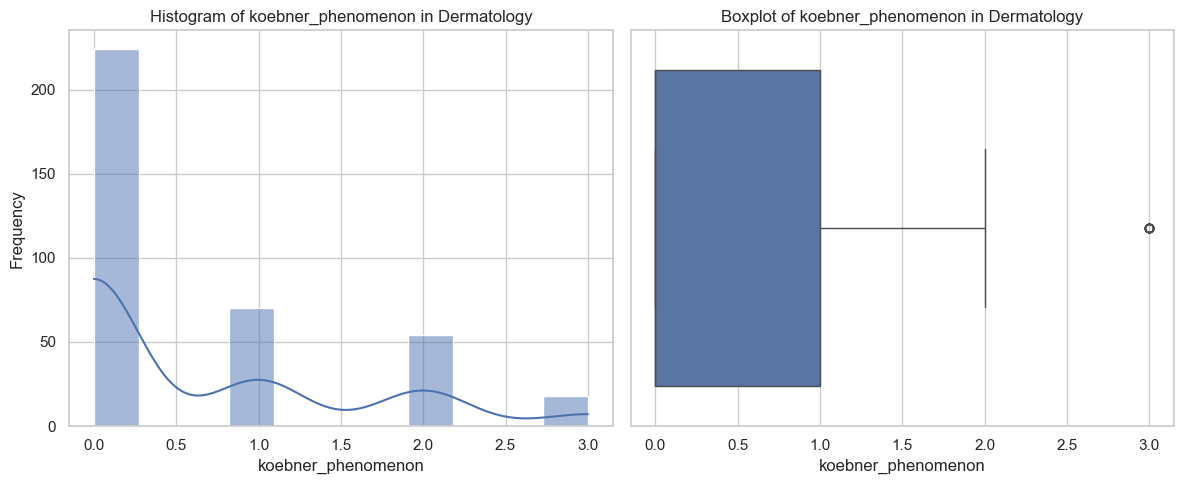

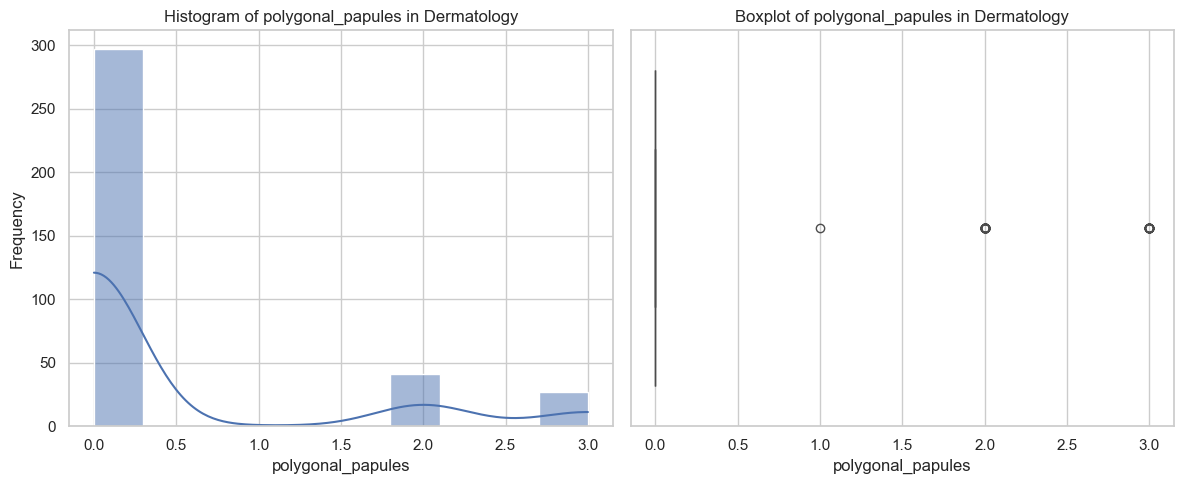

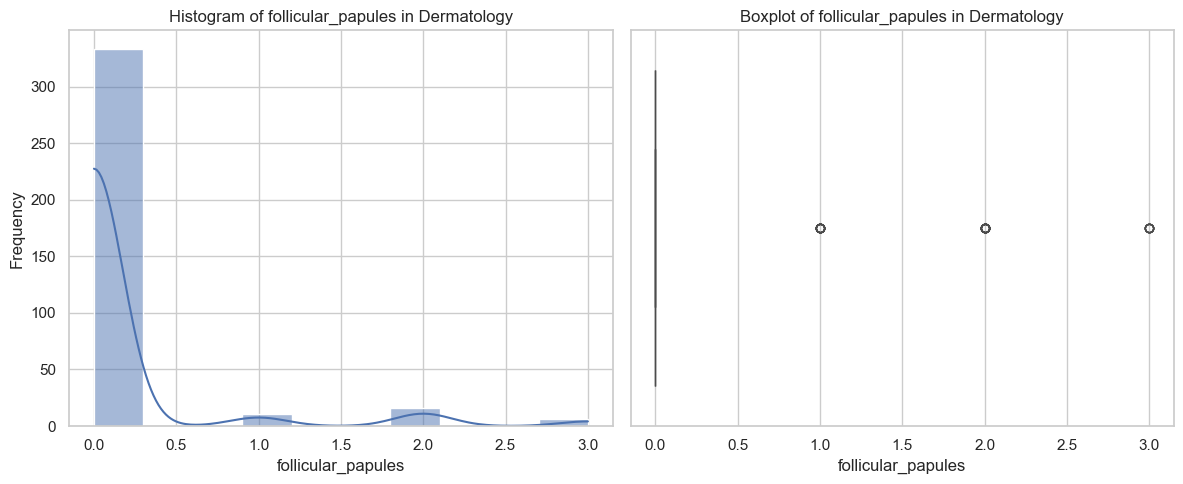

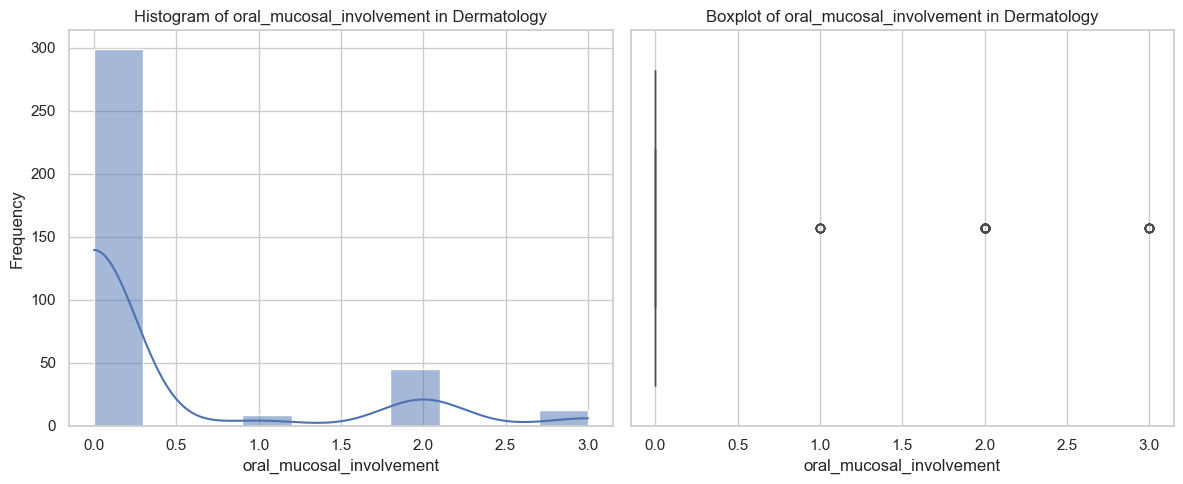

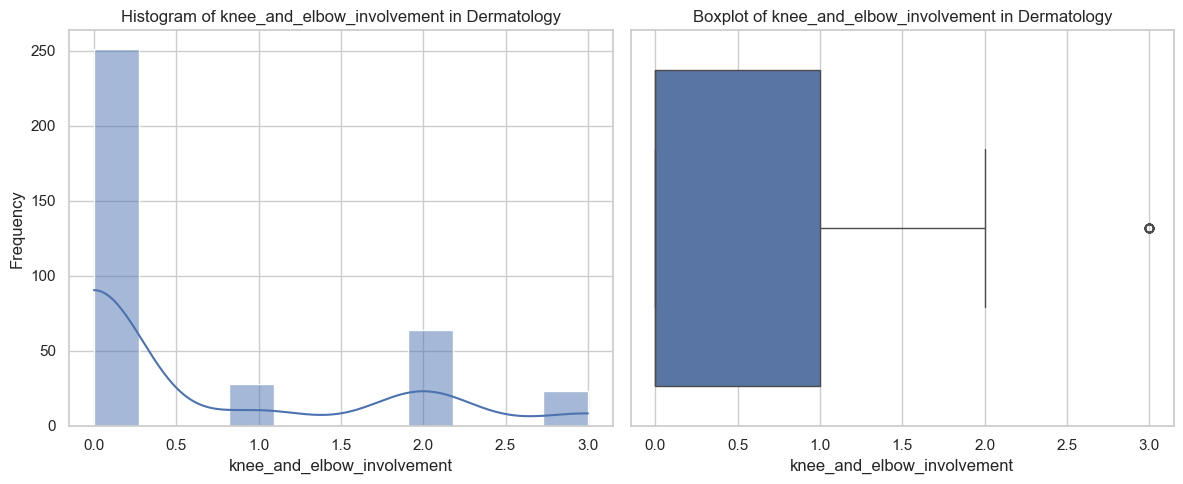

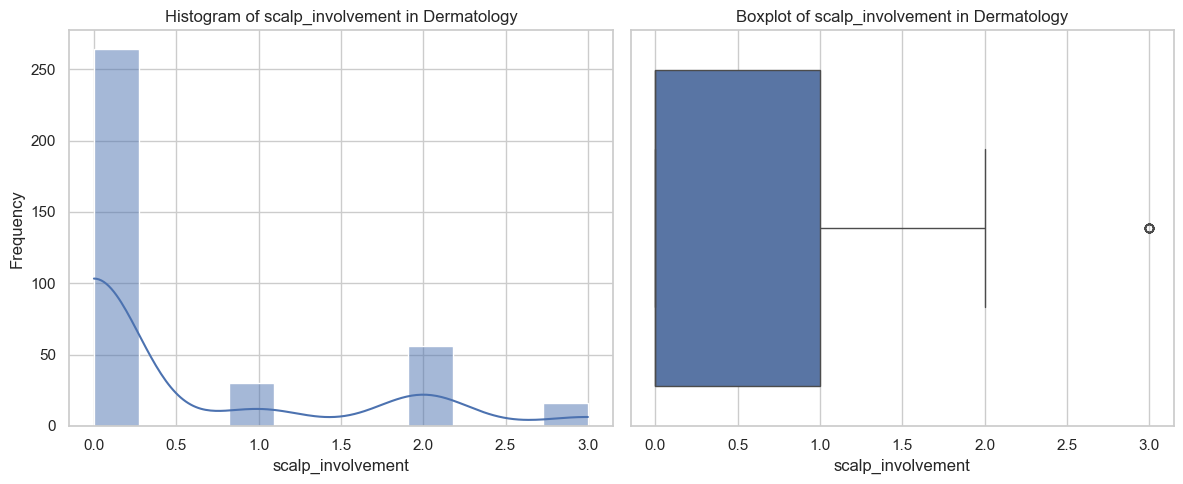

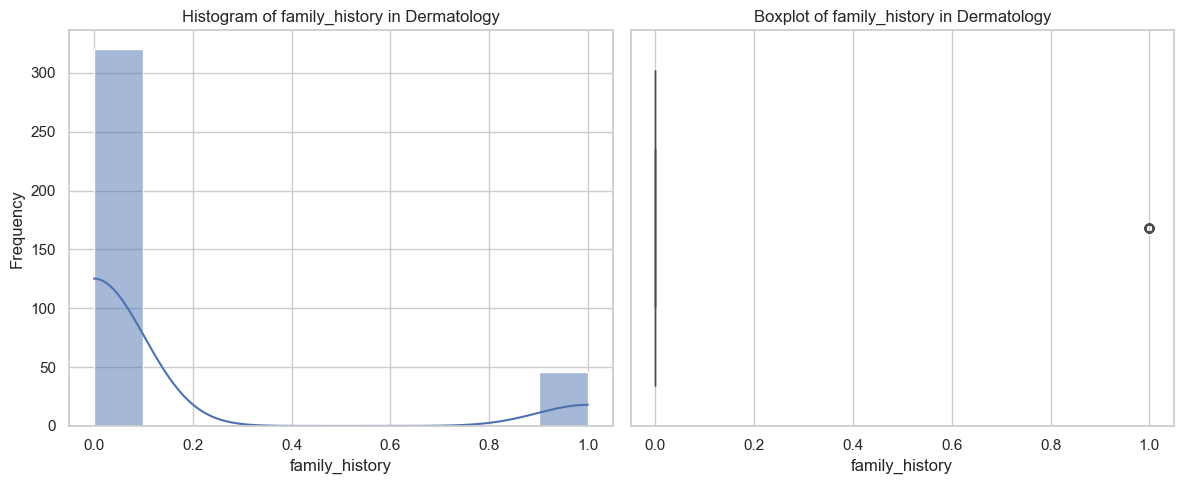

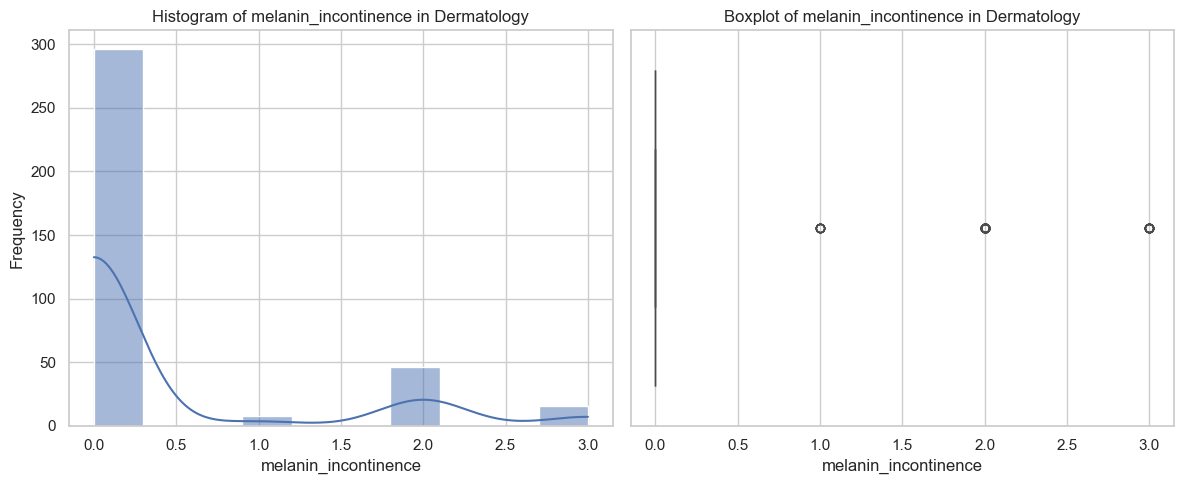

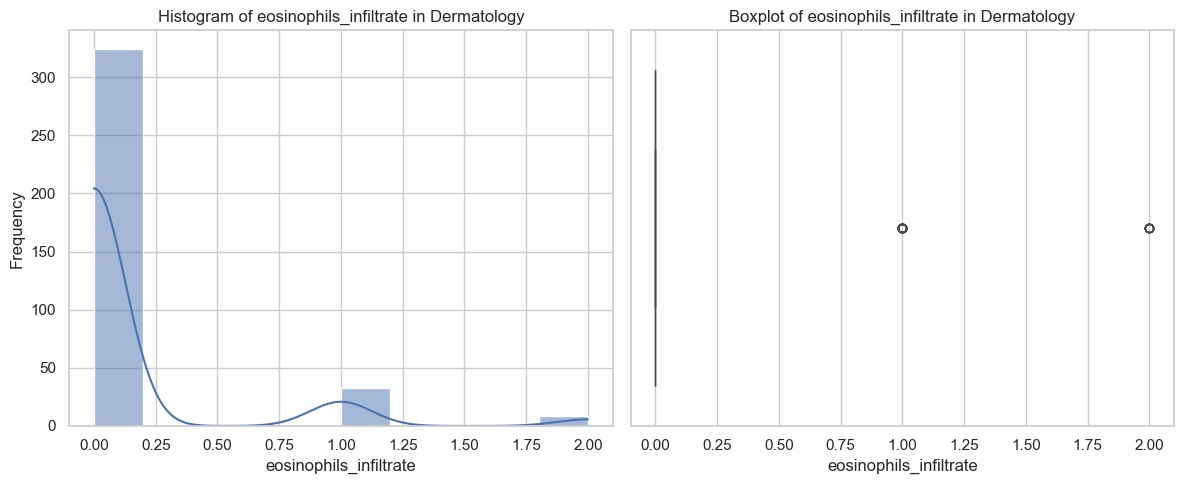

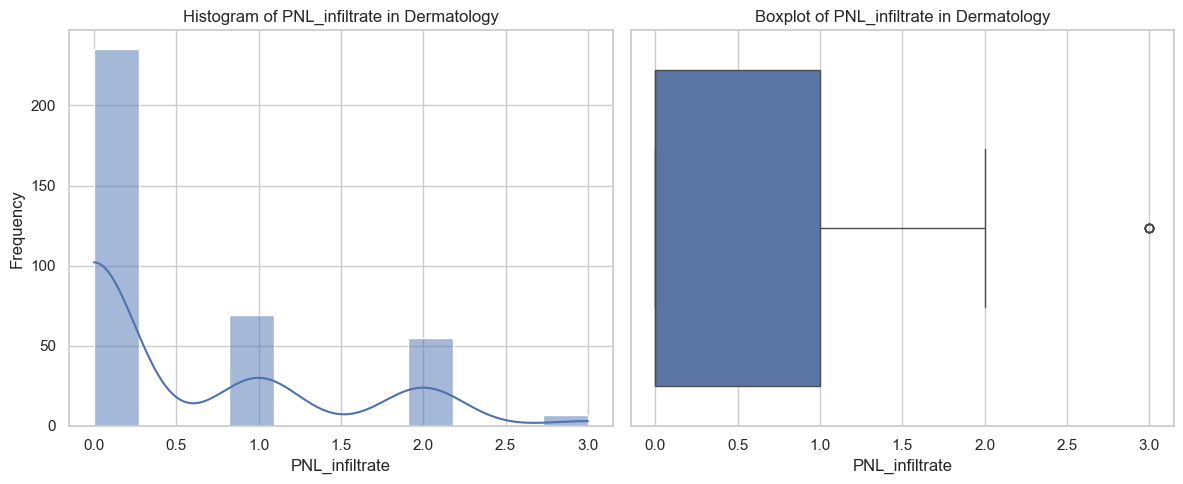

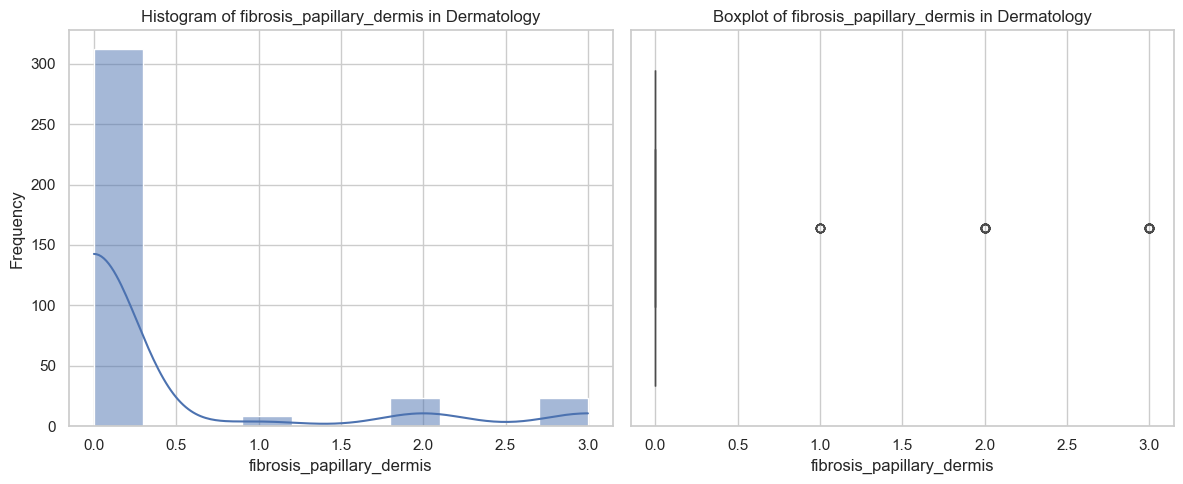

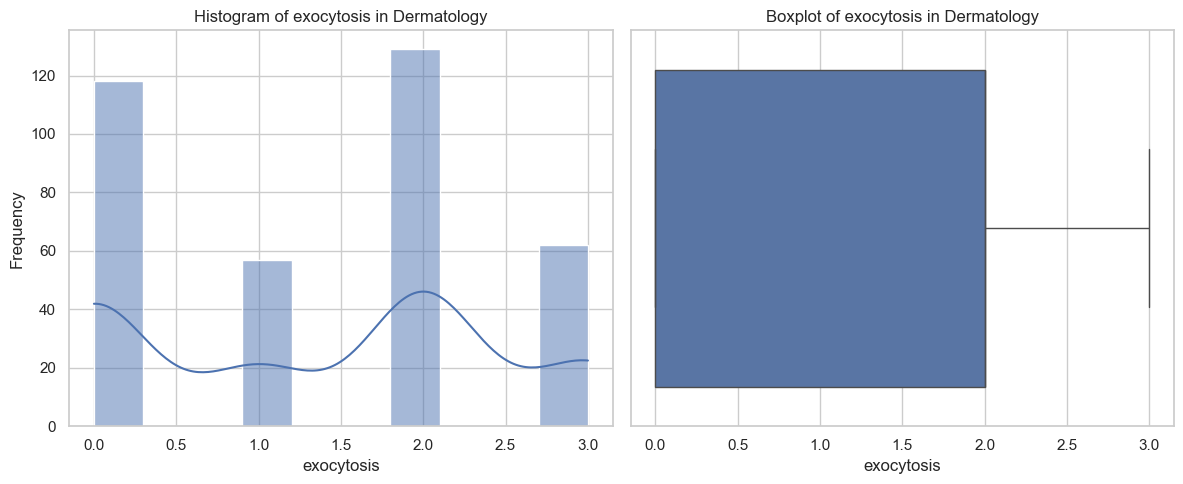

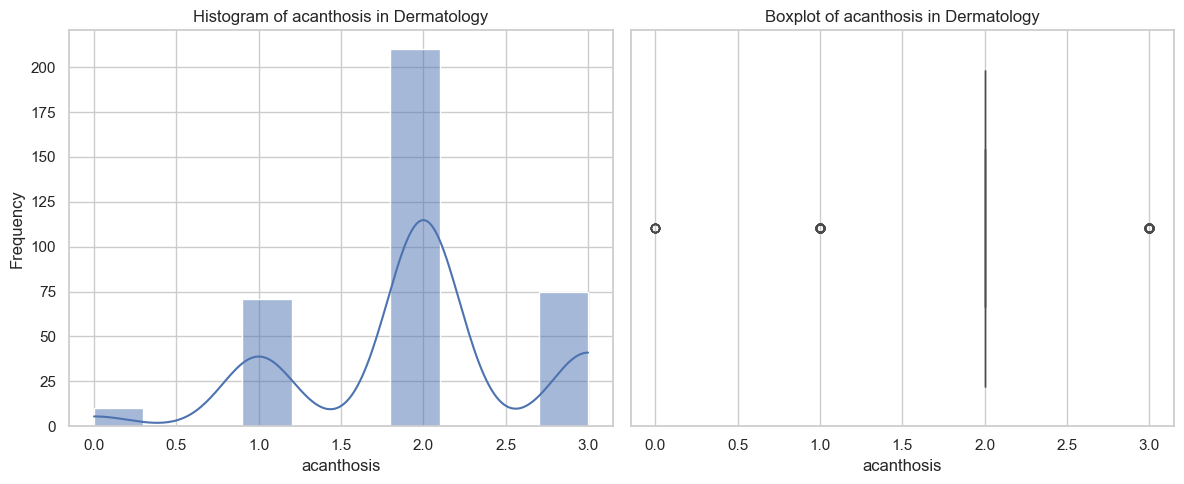

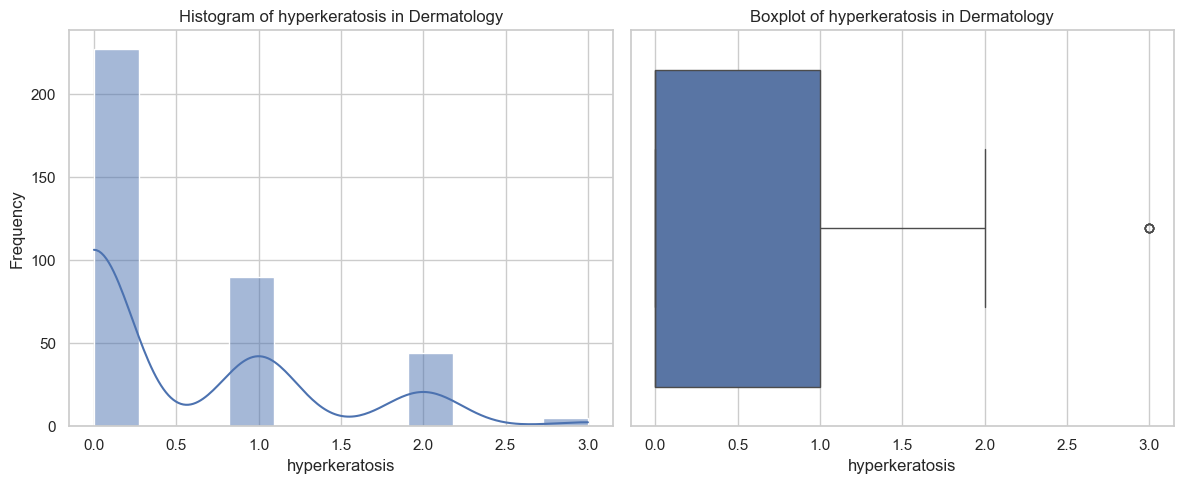

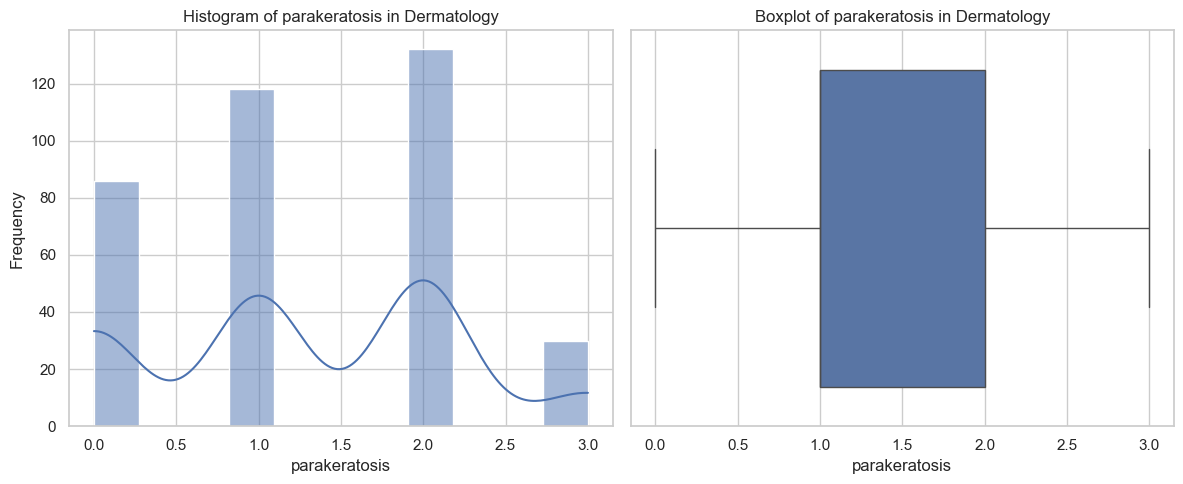

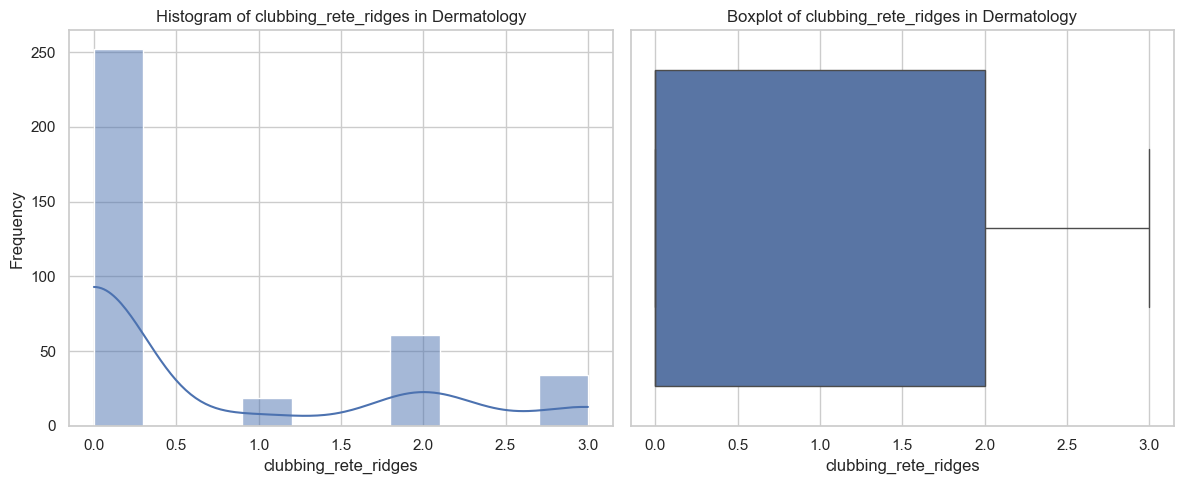

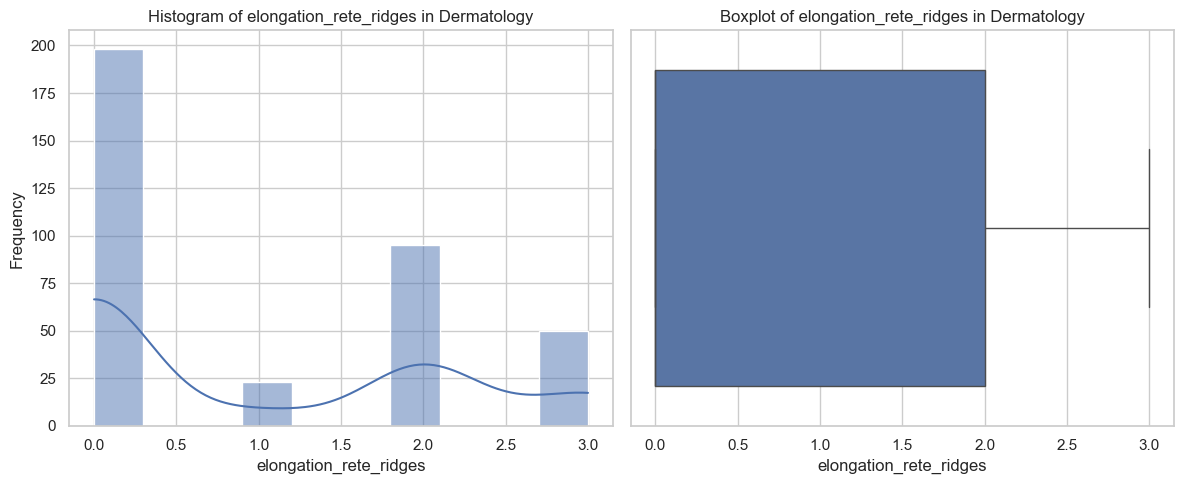

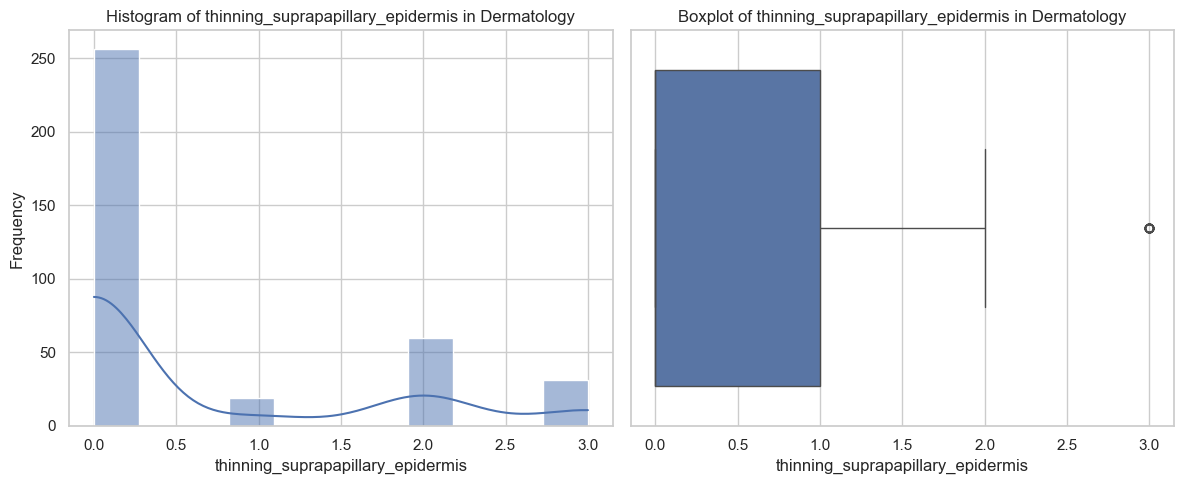

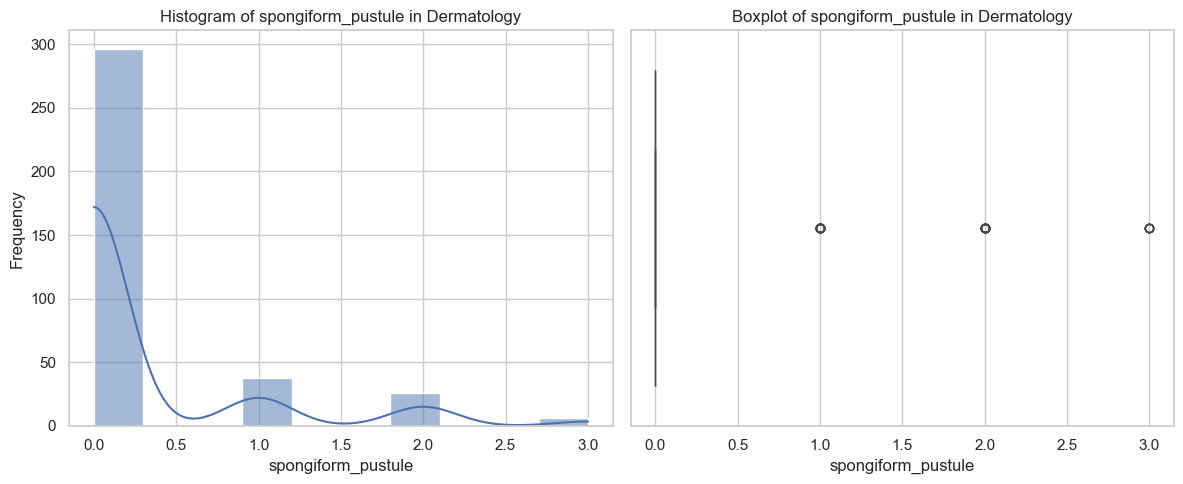

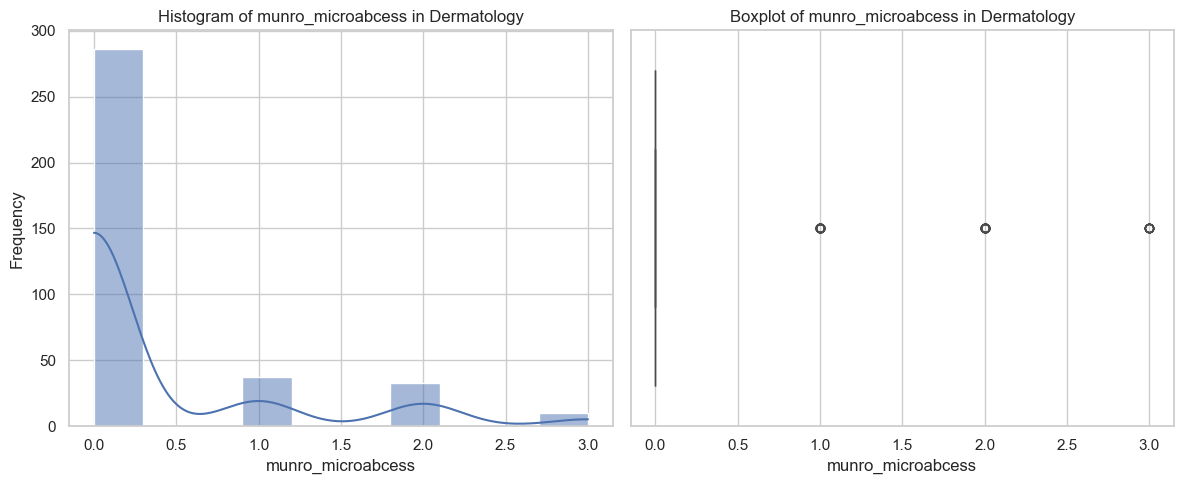

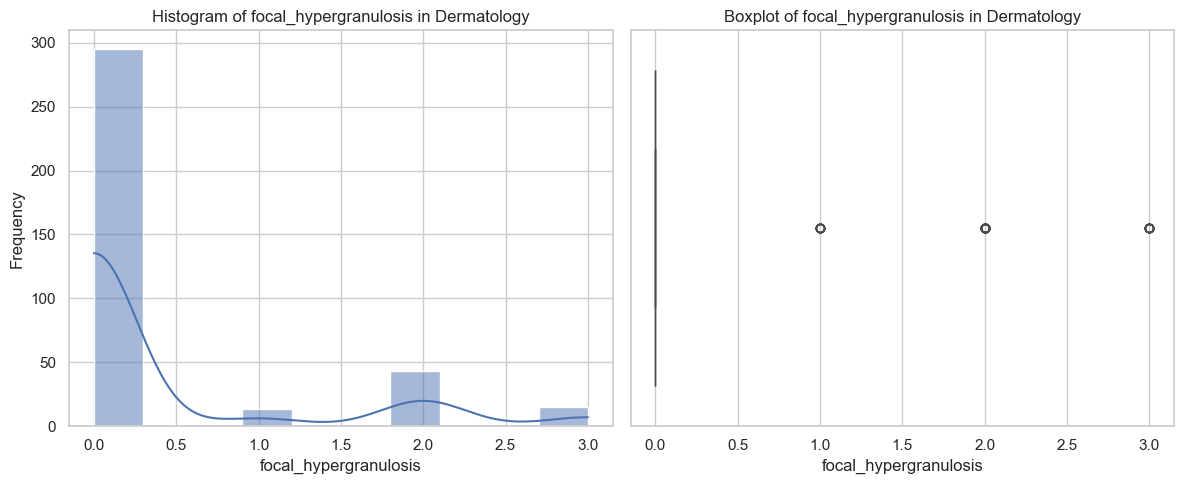

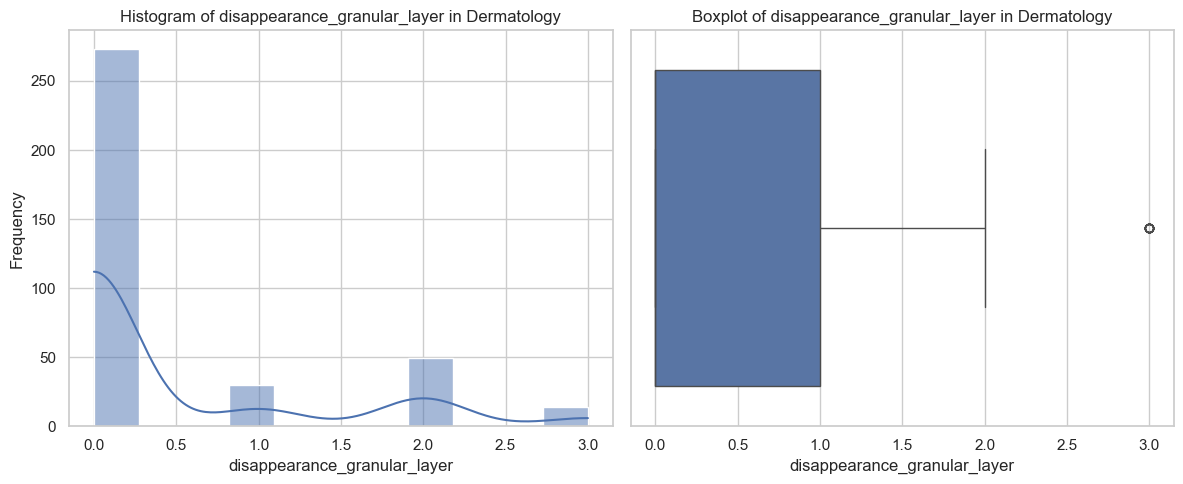

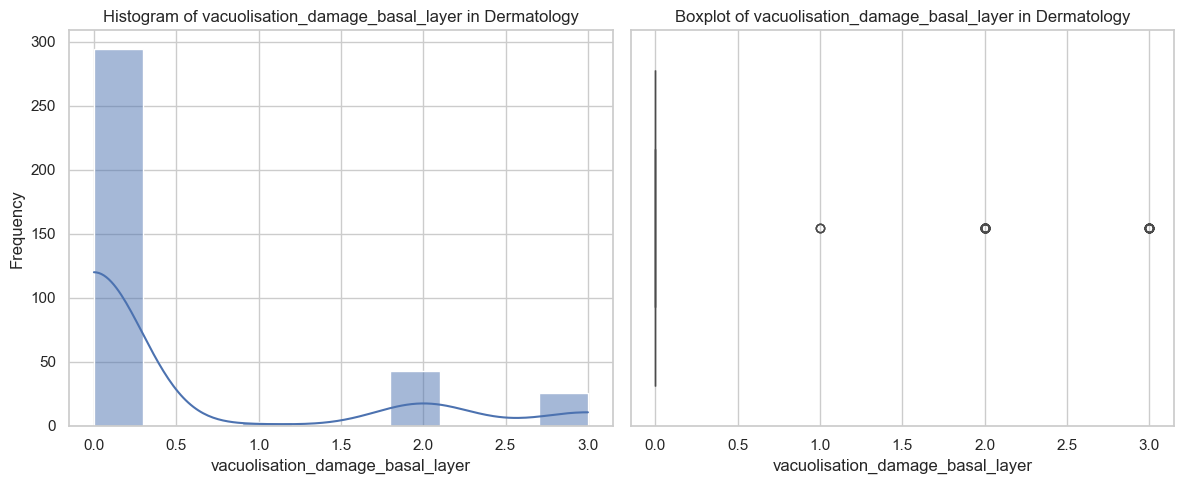

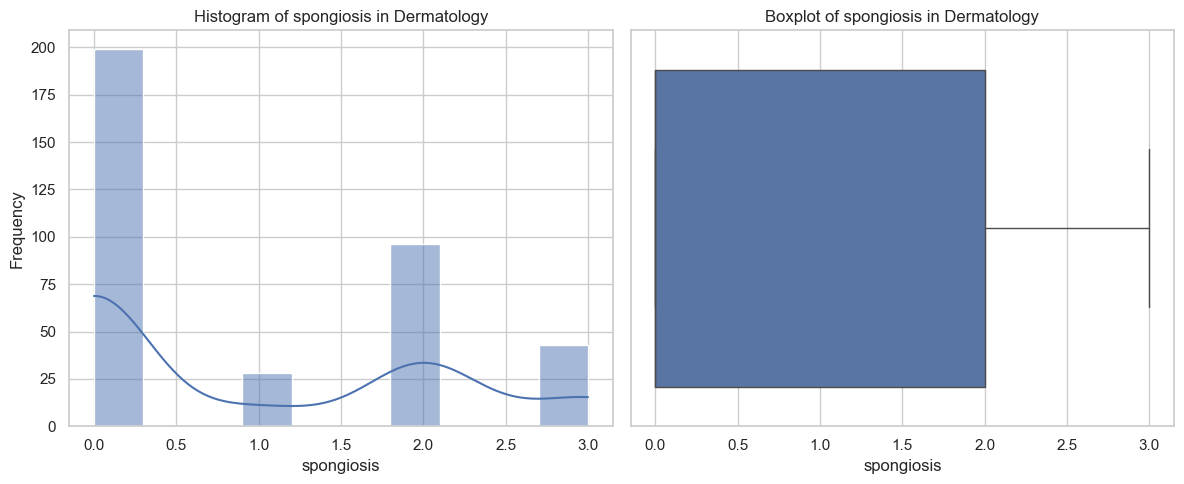

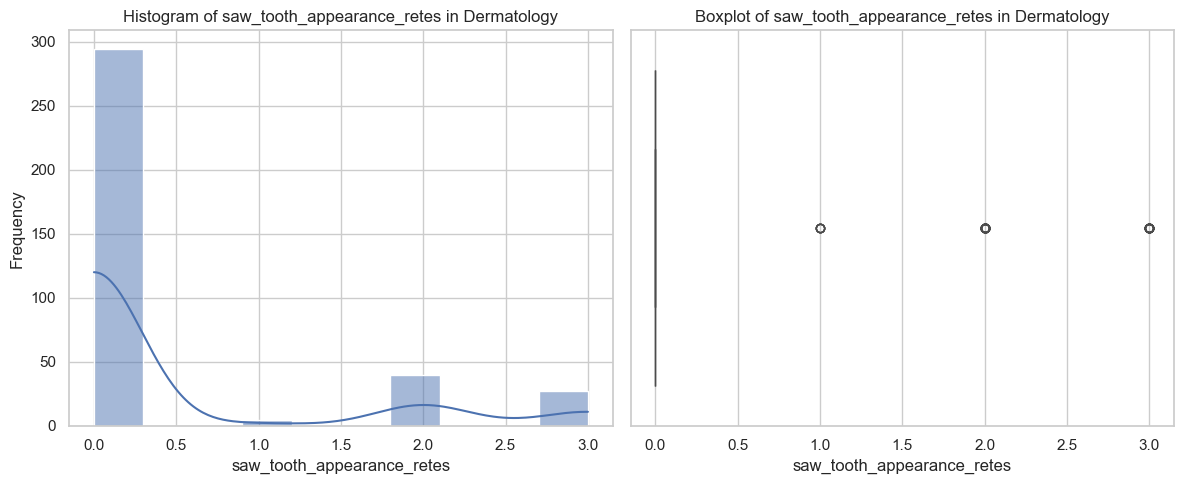

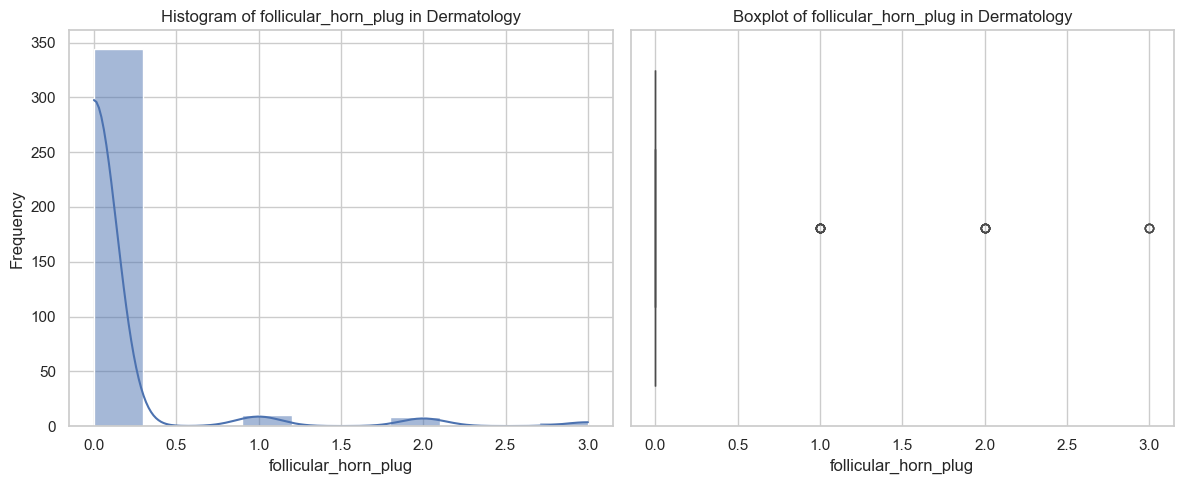

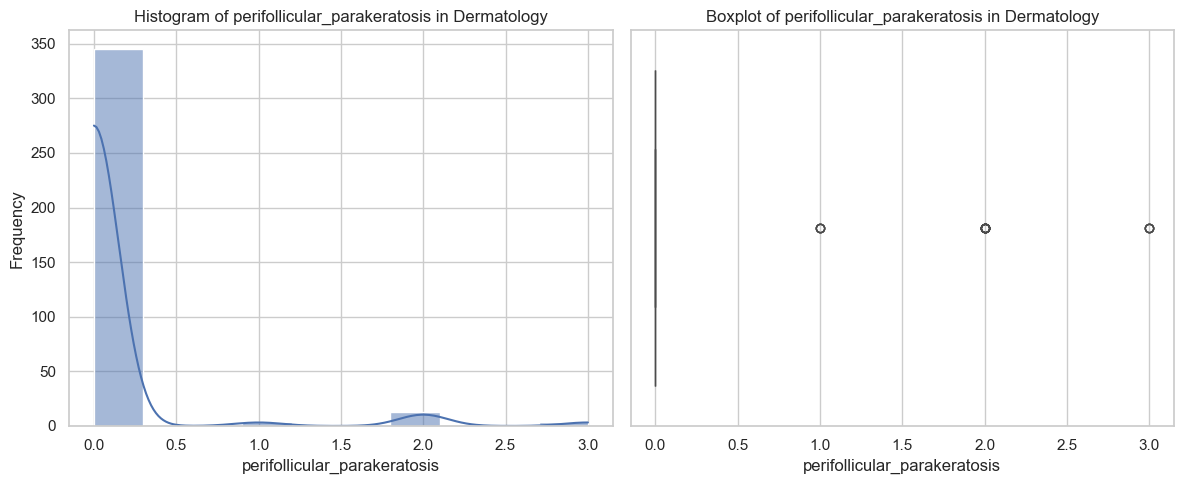

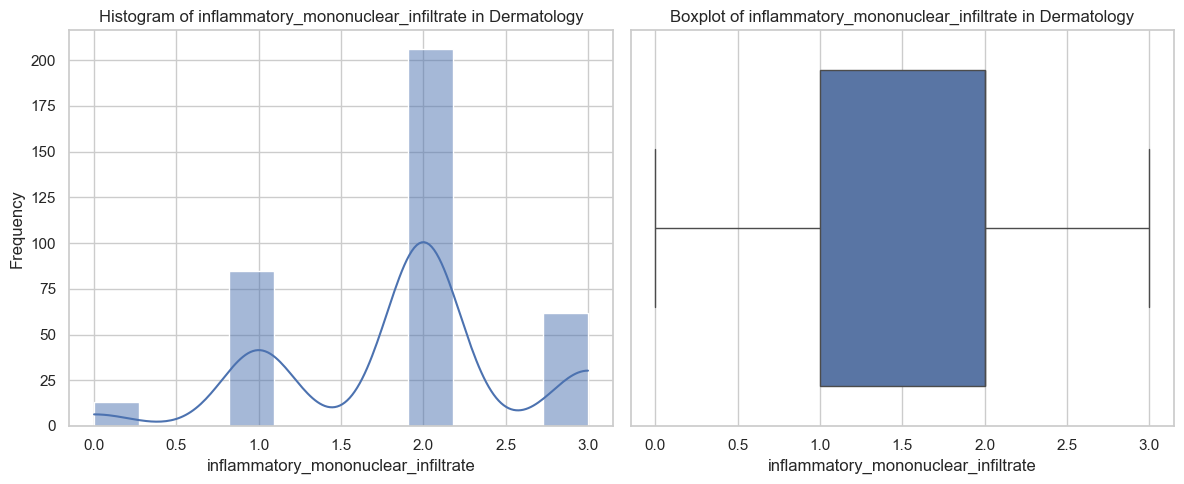

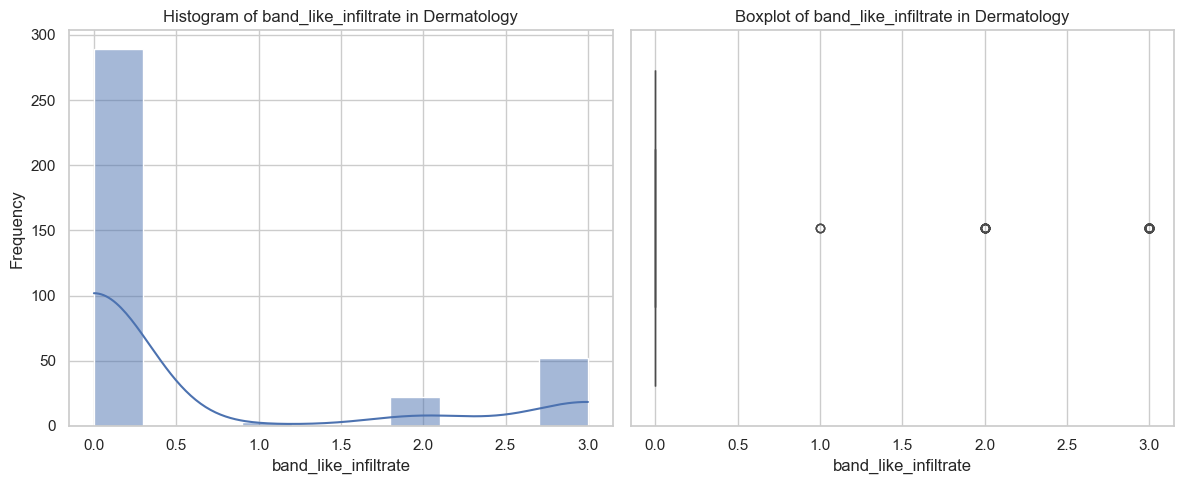

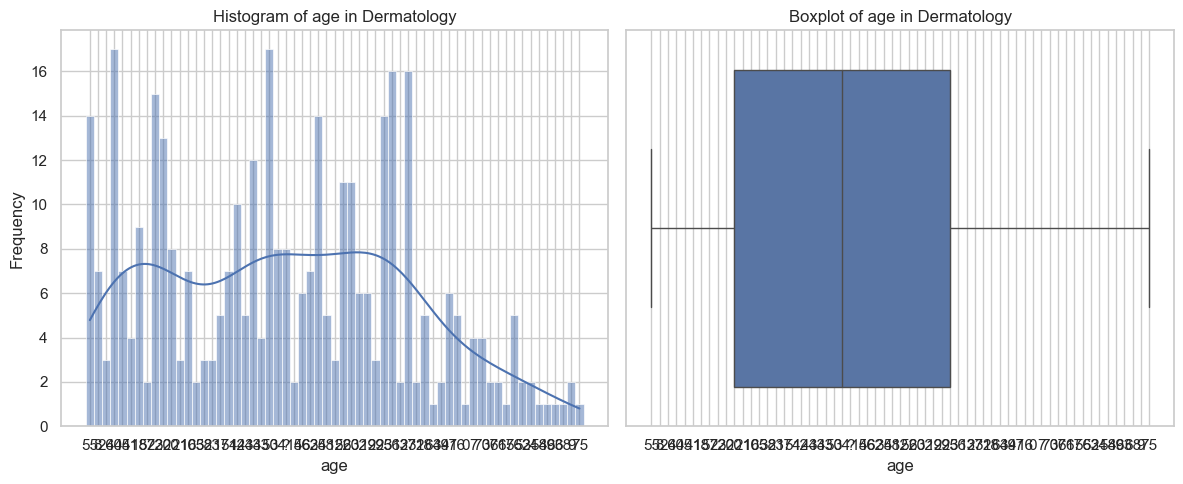

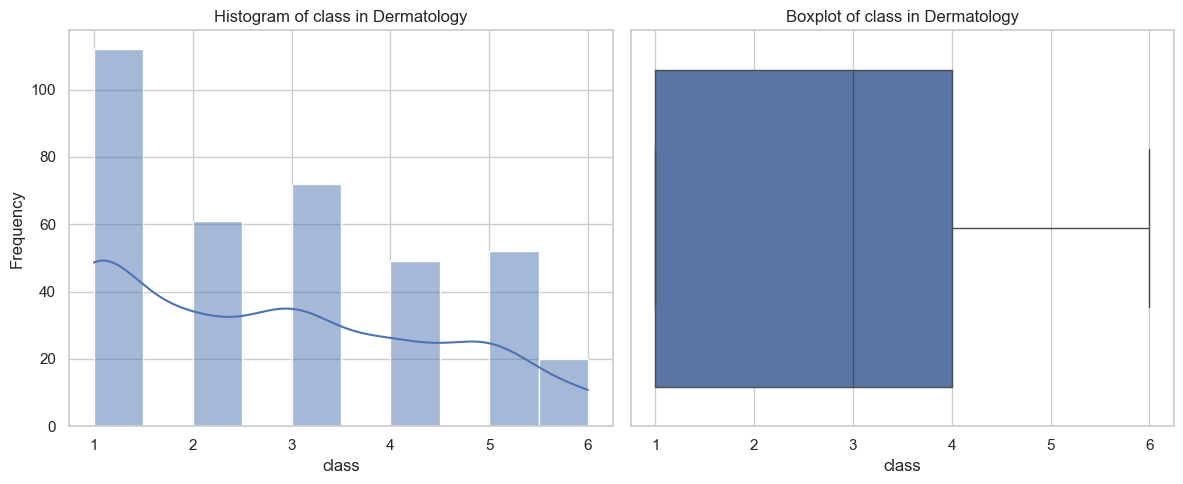

In [53]:
sns.set(style="whitegrid")

def visualize_distributions(dataset, dataset_name):
    numerical_columns = dataset.select_dtypes(include=['int64', 'float64','object']).columns

    for column in numerical_columns:
        plt.figure(figsize = (12, 5))

        #histogram subplots - creates figure and grid of subplots with a single call
        plt.subplot(1, 2, 1)
        sns.histplot(dataset[column], kde=True)
        plt.title(f'Histogram of {column} in {dataset_name}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column} in {dataset_name}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

visualize_distributions(dataset2, "Dermatology")

#age is out of order because we have taken whole dataset


4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

I also coded the heatmap to see it better. As seen in the bar graph, the dataset is not balanced since Class 1 is in majority compared to other classes. This makes the dataset imbalanced. I first set the target variable which is the column name for the class labels. Then, I counted the occurrences of each class by using `.value_counts()`. I created the figure, then, plotted the bar chart. I set up the title of the graph, x axis, y axis and rotated the x axis labels by 360 degrees to see it better. Displayed the plot by `show()`

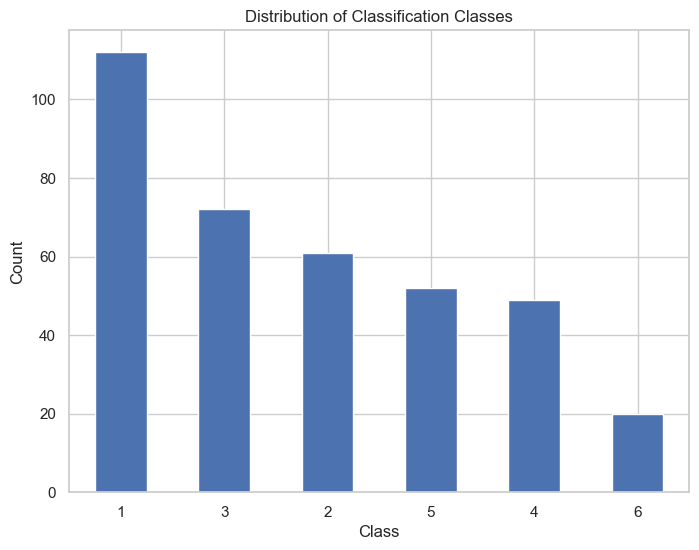

In [85]:
target_variable = 'class'

# Count the occurrences of each class
class_counts = dataset2[target_variable].value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Classification Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()


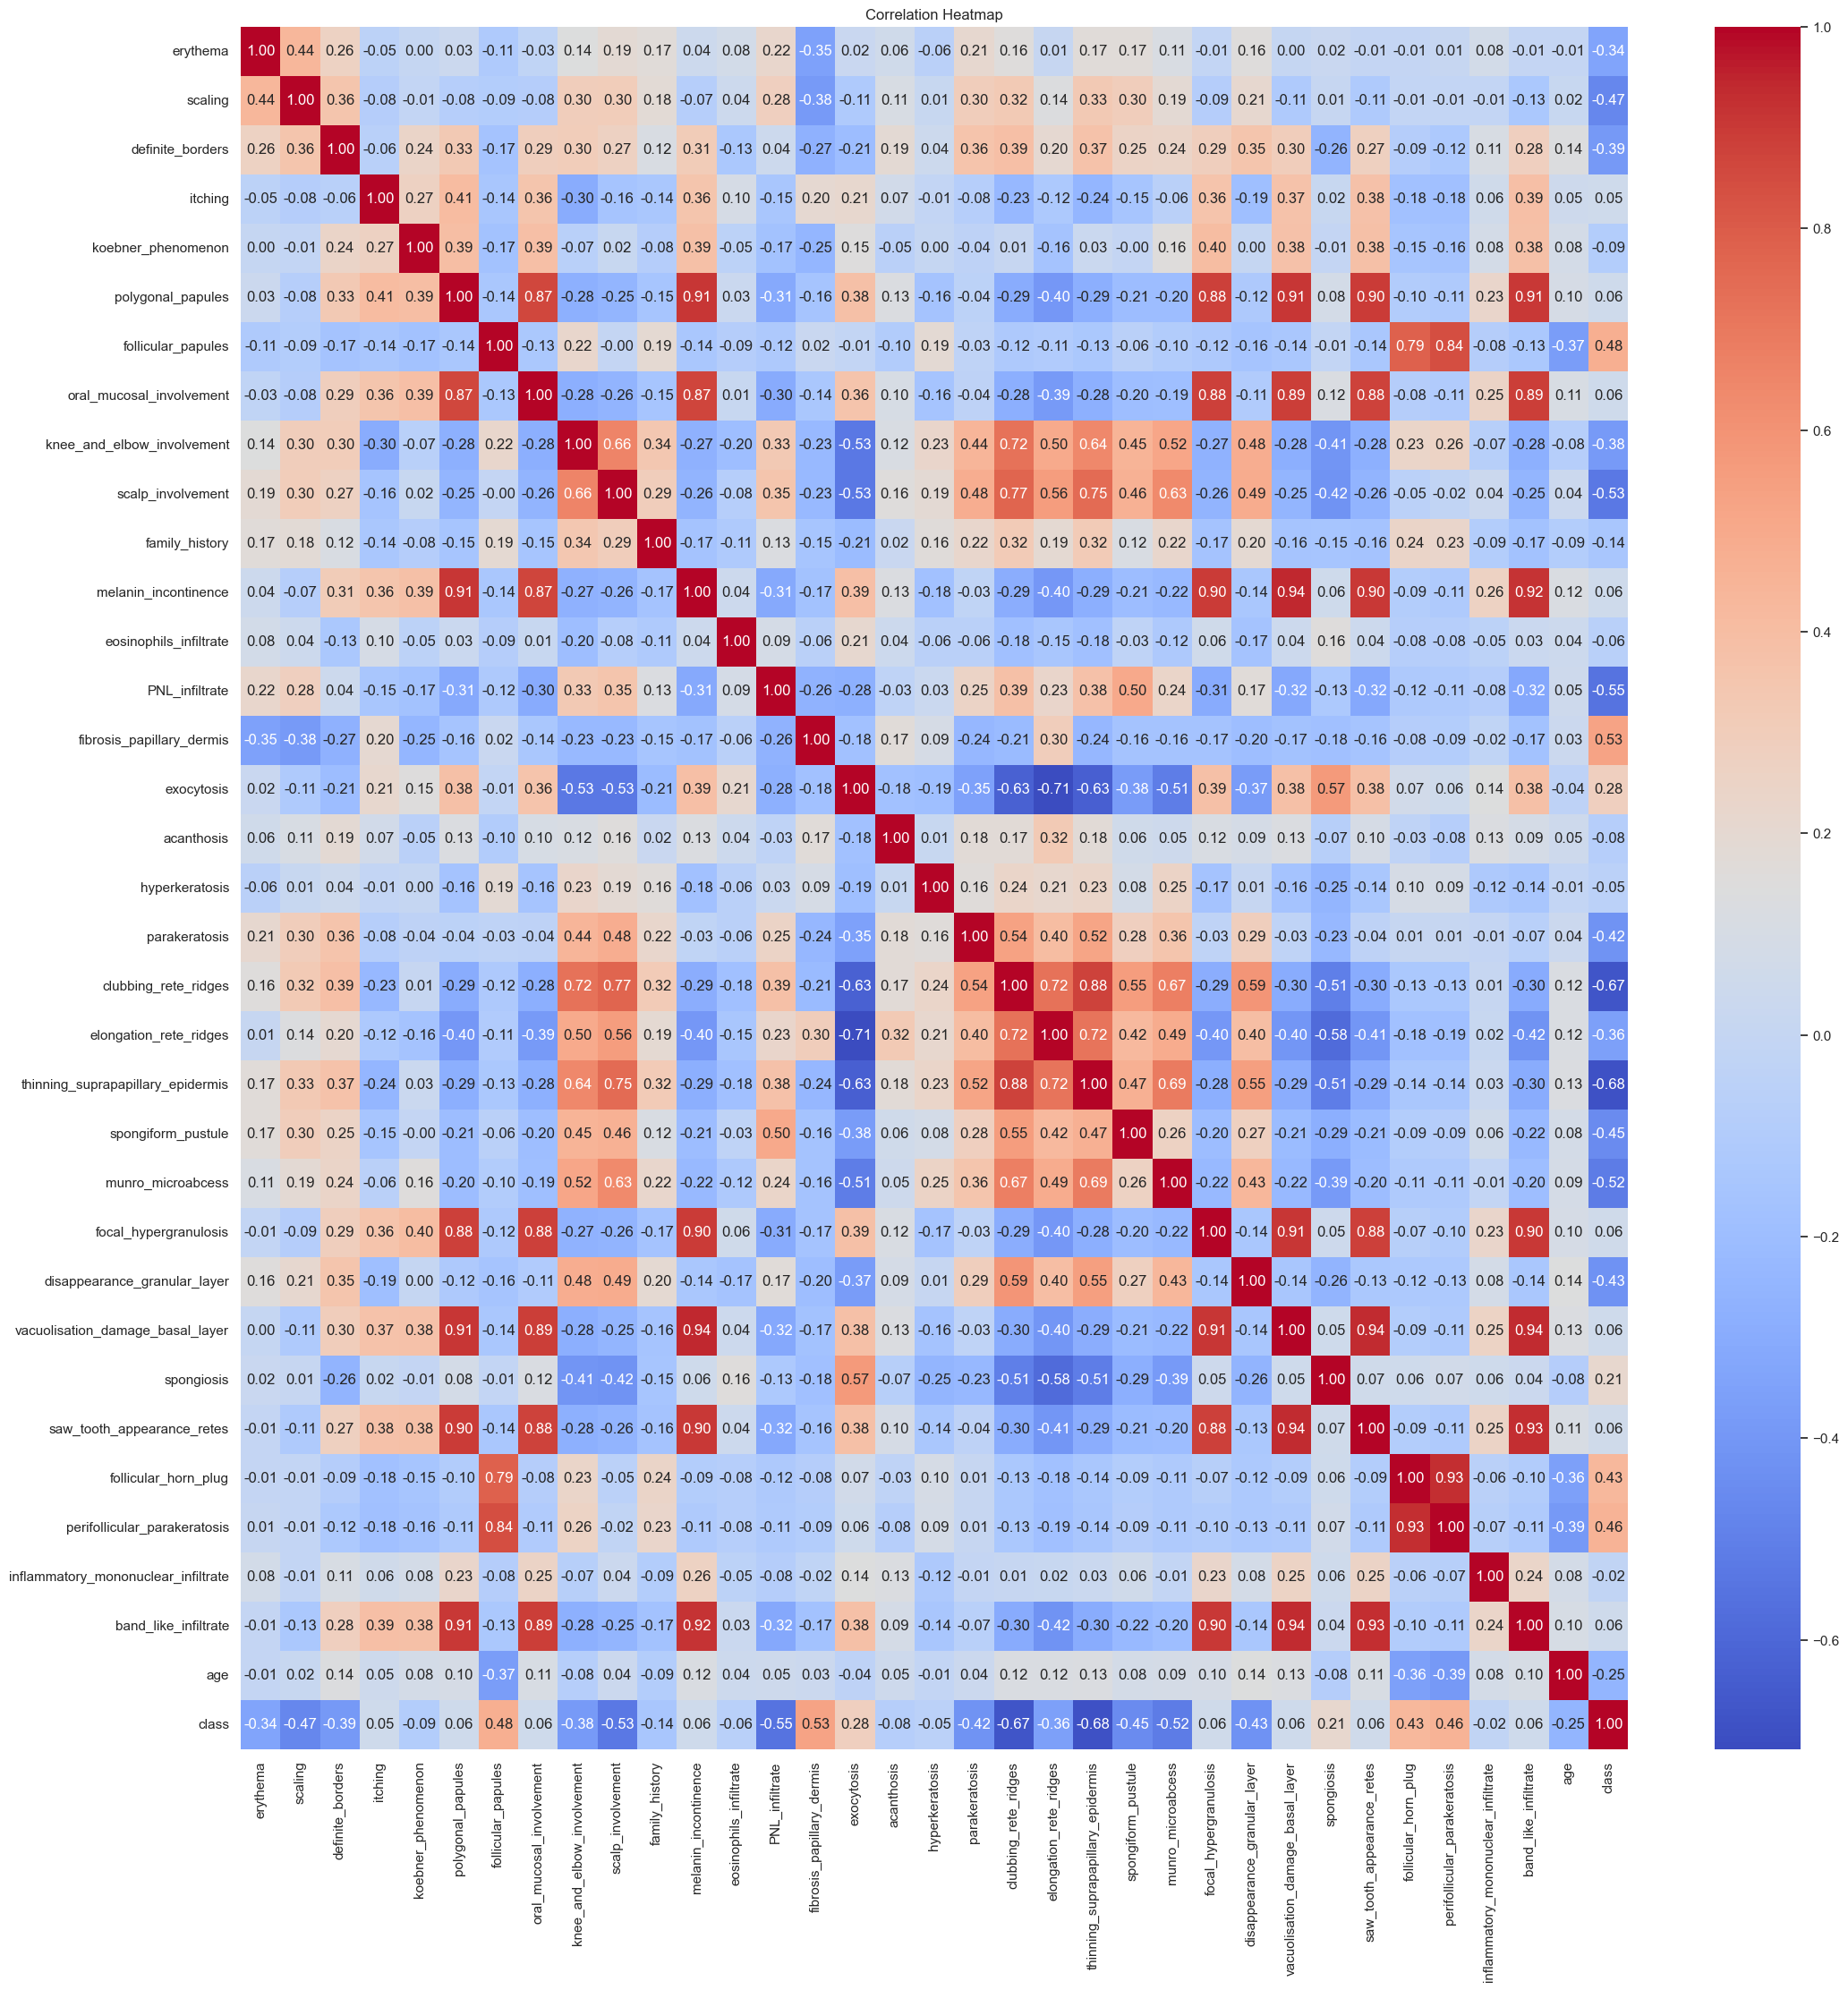

In [60]:
# Replace '?' with NA
dataset2.replace('?', pd.NA, inplace=True)

dataset2 = dataset2.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(25, 25))
sns.heatmap(dataset2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [68]:
X = dataset2.drop(target_variable, axis=1)
y = dataset2[target_variable]

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [72]:
#Splitting the Data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before and after the transformation. See [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). If your dataset does not have categorical data, show how to apply the one-hot encoder to the label (target variable).

**5.1**
 

Since the Dermatology Dataset has only numerical features, I used `StandardScaler` to preprocess the data. Standardizing the features by removing the mean and scaling to unit variance is important because I wanted to make sure that each feature is contributing equally to the model's performance. I splitted the data into training and testing sets before applying preprocessing, so that the scaling is applied consistently during both training and testing.

In [78]:

#5.2 

one_hot_encoder = OneHotEncoder()
categorical_column = ['age']

X = dataset2.drop(target_variable, axis=1)
y = dataset2[target_variable]

for column in categorical_column:
    X[column] = one_hot_encoder.fit_transform(X[[column]]).toarray()

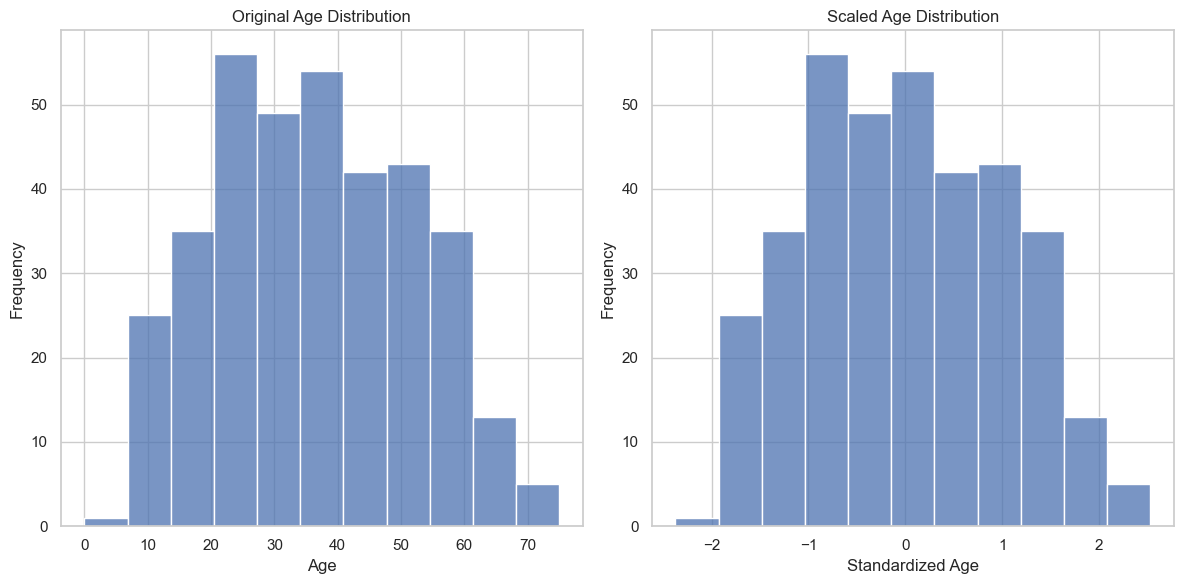

In [79]:
#5.1 

#Standard Scaler for Numerical Features Transformation

plt.figure(figsize=(12, 6))

# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(dataset2['age'])
plt.title('Original Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

#StandardScaler
scaler = StandardScaler()

age_reshaped = dataset2['age'].values.reshape(-1, 1)
X_train_scaled = scaler.fit_transform(age_reshaped)

dataset2['age_scaled'] = X_train_scaled

plt.subplot(1, 2, 2)
sns.histplot(dataset2['age_scaled'])
plt.title('Scaled Age Distribution')
plt.xlabel('Standardized Age')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).

- For 3.1, I obtained the information from ChatGPT. I didn't know what would uninformative attribute meant as attributes in Dermatology Dataset were reliable to use. Therefore, by asking `Can you explain what uninformative attribute mean in a dataset?`, I was able to search for attributes missing 50% of data or attributes containing non-unique values.

- For 2.2, I referred to this [Website](https://www.kaggle.com/code/kirtanmatalia26/dermatology-dataset-using-svm)

- For Preprocessing Part (5), to be able to understand the use of each preprocessing, I inquiried ChatGPT with the following prompts: <br>
`Can you list me all the preprocessing methods for numerical values with their use cases?` <br>
`Why do we need to preprocess data before splitting or why do we need to preprocess data since we have amputated the missing values?`

- For Preprocessing Part 5, I used these [website] https://medium.com/@shubhshreeaishwarya/valueerror-expected-2d-array-got-1d-array-instead-fixed-95c7c0756b83 and [website2] https://medium.com/geekculture/sklearn-expects-data-to-be-in-shape-64fbcaf80a8c on how to resolve the bugs 

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".